In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

# 1. Зниження розмірності і візуалізація даних

Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.

In [15]:
main_data = pd.read_csv('magic04.csv')
main_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [17]:
scaler = StandardScaler()
scaler.fit(main_data.drop('class',axis=1))
main_data_scaled = scaler.transform(main_data.drop('class',axis=1))

In [18]:
main_data_scaled

array([[-0.57722602, -0.33680419, -0.38113037, ..., -0.40584194,
         0.47681587, -1.49786555],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.49009359,
        -0.81541816,  0.15312459],
       [ 2.56827756,  6.20585836,  2.61578306, ..., -2.18302986,
         1.88922413,  0.84263513],
       ...,
       [ 0.52392318,  1.38177927,  1.31887687, ..., -0.4665087 ,
         0.10163583,  0.83900338],
       [ 1.58775746,  2.98278123,  2.47337518, ..., -3.07720555,
         2.18525981,  2.87032093],
       [ 3.16145936,  1.67999288,  0.81314905, ...,  1.49930076,
         0.96101431,  1.05044239]])

In [19]:
X = main_data_scaled
y = main_data["class"].values
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

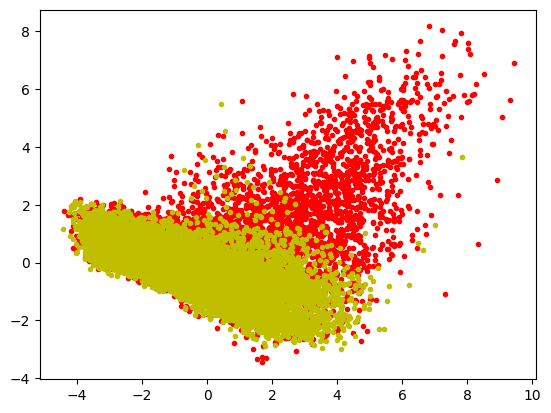

In [20]:
plt.plot(X_reduced[:,0][y == 0], X_reduced[:,1][y == 0], "r.")
plt.plot(X_reduced[:,0][y == 1], X_reduced[:,1][y == 1], "y.")

/home/user/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/user/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


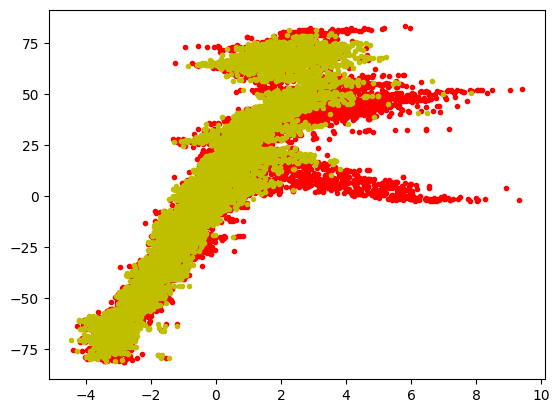

In [21]:
pca = TSNE(n_components=2)
X_reduced2 = pca.fit_transform(X)
plt.plot(X_reduced[:,0][y == 0], X_reduced2[:,1][y == 0], "r.")
plt.plot(X_reduced[:,0][y == 1], X_reduced2[:,1][y == 1], "y.")

# 3. Обробка та класифікація текстових даних

Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. 

In [22]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
extra_stop = ['subject', 're', 'from', 'organization', 'lines', 'nntppostinghost']

In [24]:
#re.sub(r'\b[a-zA-Z\.]*@[a-zA-Z\.]*\b', '', text)

In [25]:
WNL = nltk.WordNetLemmatizer()
pattern = re.compile(r'\b' + r'\b|\b'.join(stopwords.words('english') + extra_stop) + r'\b')

data = []
text = ""
for name in os.listdir("20news-bydate/20news-bydate-train/misc.forsale"):
    with open("20news-bydate/20news-bydate-train/misc.forsale/"+name,
              "r", encoding='utf-8',
              errors='ignore') as f:
        text = ' '.join(text.split("\n")[6:-3])
        text = f.read()
        text = re.sub('From: .*\n', '', text)
        text = text.lower()
        text = text.replace("\n", " ")
        text = re.sub(r'\b[a-zA-Z\.]*@[a-zA-Z\.]*\b', '', text)
        text = re.sub('[^a-zA-Z ]', '', text)
        text = pattern.sub('', text)
        text = WNL.lemmatize(text)
        data.append([text, "misc.forsale", 0])
for name in os.listdir("20news-bydate/20news-bydate-train/rec.sport.baseball"):
    with open("20news-bydate/20news-bydate-train/rec.sport.baseball/"+name,
              "r", encoding='utf-8',
              errors='ignore') as f:
        text = f.read()
        text = ' '.join(text.split("\n")[6:-3])
        text = text.lower()
        text = text.replace("\n", " ")
        text = re.sub('From: .*\n', '', text)
        text = re.sub(r'\b[a-zA-Z\.]*@[a-zA-Z\.]*\b', '', text)
        text = re.sub('[^a-zA-Z ]', '', text)
        text = pattern.sub('', text)
        text = WNL.lemmatize(text)
        data.append([text, "rec.sport.baseball", 1])
for name in os.listdir("20news-bydate/20news-bydate-train/talk.religion.misc"):
    with open("20news-bydate/20news-bydate-train/talk.religion.misc/"+name,
              "r", encoding='utf-8',
              errors='ignore') as f:
        text = f.read()
        text = ' '.join(text.split("\n")[6:-3])
        text = text.lower()
        text = text.replace("\n", " ")
        text = re.sub('From: .*\n', '', text)
        text = re.sub(r'\b[a-zA-Z\.]*@[a-zA-Z\.]*\b', '', text)
        text = re.sub('[^a-zA-Z ]', '', text)
        text = pattern.sub('', text)
        text = WNL.lemmatize(text)
        data.append([text, "talk.religion.misc", 2])
df = pd.DataFrame(data, columns = ['text', 'class', 'class_id']) 
df

,text,class,class_id
0,motorcycle wanted worcester polytechnic inst...,misc.forsale,0
1,boat sale ohio state university dept comp...,misc.forsale,0
2,wanted brother ptouch articleid hydra distrib...,misc.forsale,0
3,make talking elevators xxxmessageid aeesli...,misc.forsale,0
4,rent timeshare week xreceived usenetpadecc...,misc.forsale,0
...,...,...,...
1554,things ye learned received heard seen...,talk.religion.misc,2
1555,wrote judging postings ive read usenet n...,talk.religion.misc,2
1556,wrote jesus never taught concept trinity ...,talk.religion.misc,2
1557,writes article apr bzaw stephen think...,talk.religion.misc,2


/home/user/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


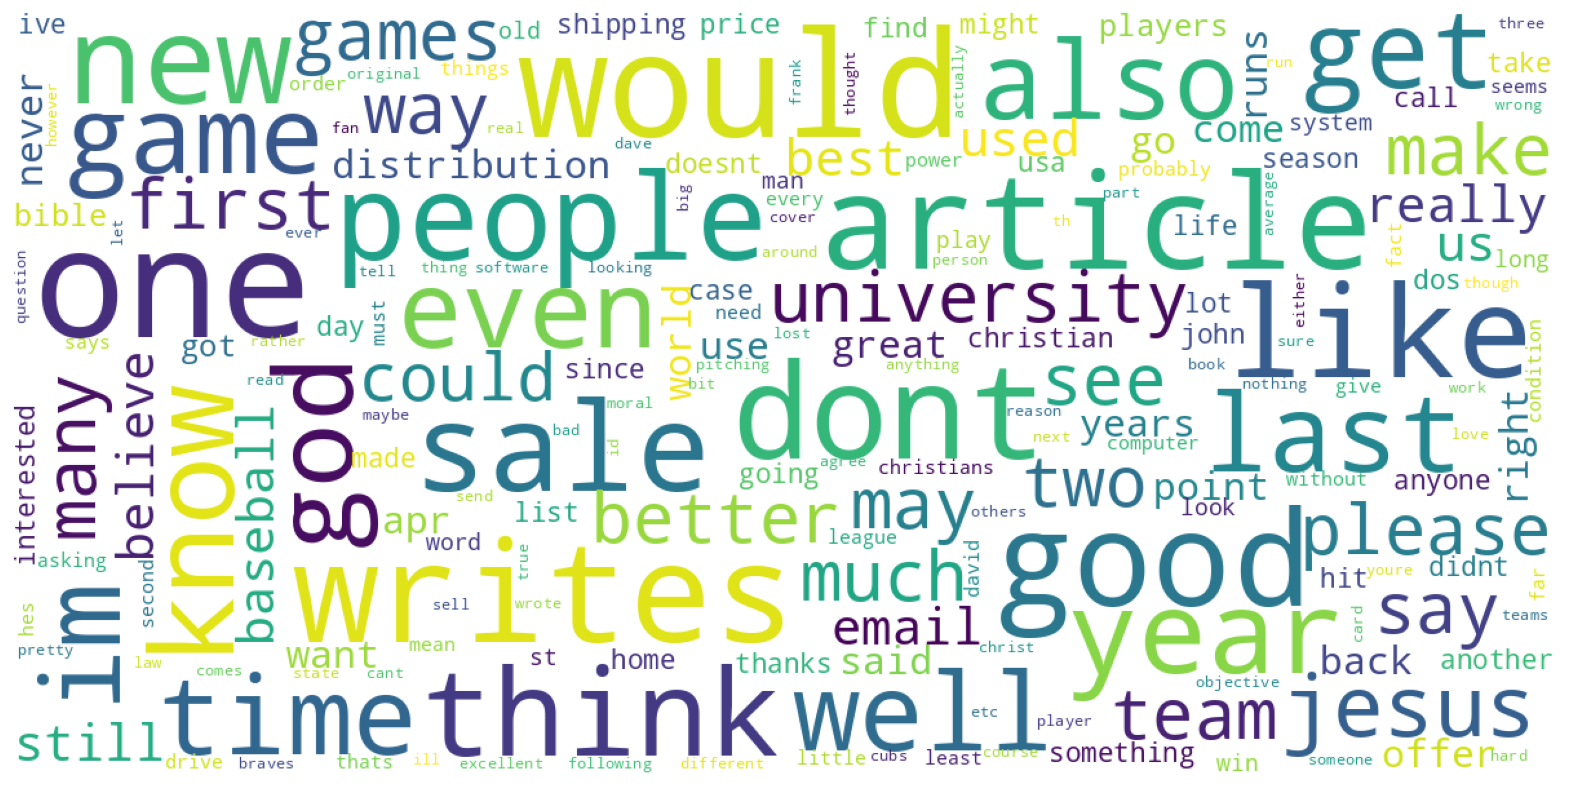

In [26]:
N_GRAM = 1

vectorizer = CountVectorizer(ngram_range=(N_GRAM, N_GRAM))
X = vectorizer.fit_transform(df["text"].values)
X = X.toarray()

freq_dict = {i:j for i,j in zip(vectorizer.get_feature_names(), np.sum(X, axis=0))}

wordcloud = WordCloud(background_color='white',
                      stopwords=None,
                      max_words=200,
                      max_font_size=40,
                      scale=3,).generate_from_frequencies(freq_dict)#.generate(data)

fig = plt.figure(1, figsize=(20, 40))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

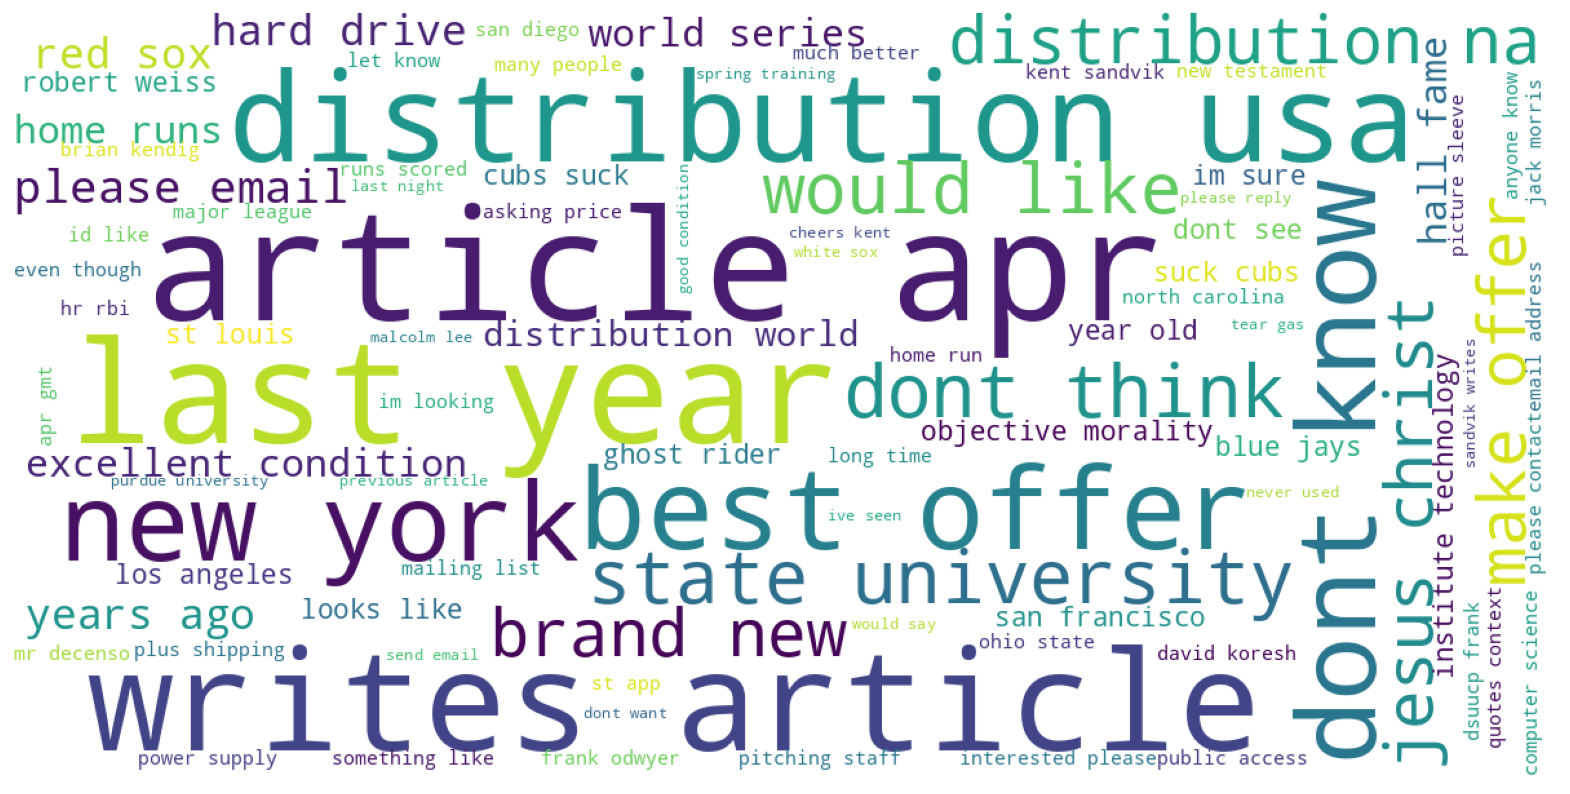

In [27]:
N_GRAM = 2

vectorizer = CountVectorizer(ngram_range=(N_GRAM, N_GRAM))
X = vectorizer.fit_transform(df["text"].values)
X = X.toarray()

freq_dict = {i:j for i,j in zip(vectorizer.get_feature_names(), np.sum(X, axis=0))}

wordcloud = WordCloud(background_color='white',
                      stopwords=None,
                      max_words=200,
                      max_font_size=40,
                      scale=3,).generate_from_frequencies(freq_dict)#.generate(data)

fig = plt.figure(1, figsize=(20, 40))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer)

In [28]:
vectorizer = TfidfVectorizer()#CountVectorizer(ngram_range=(1, 1))#
X = vectorizer.fit_transform(df['text'])
y = df['class_id'].values
feature_names = vectorizer.get_feature_names()
X = X.toarray()
print(X.shape)

(1559, 21534)


In [29]:
t_X = np.sum(X, axis=0)
X = X[:, t_X > 1]
print(X.shape)

(1559, 2314)


In [30]:
np.max(t_X)

27.713599762392892

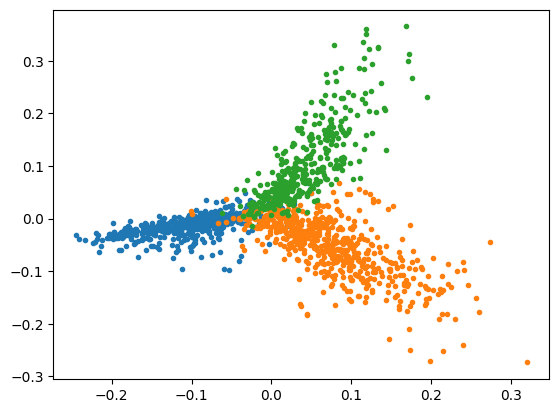

In [31]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
plt.plot(X_reduced[:,0][y == 0], X_reduced[:,1][y == 0], ".")
plt.plot(X_reduced[:,0][y == 1], X_reduced[:,1][y == 1], ".")
plt.plot(X_reduced[:,0][y == 2], X_reduced[:,1][y == 2], ".")

In [32]:
corp= ['Machine learning is super fun', 'Python is cool', 'Python is great for machine learning',
       'I like football', 'Football is great to watch']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english')
dtm = vectorizer.fit_transform(corp)
dtm

<5x10 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [33]:
dtm.toarray()

array([[0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

In [34]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
lsa = TruncatedSVD(2)
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy = False).fit_transform(dtm_lsa)
pd.DataFrame(lsa.components_, index = ['topic_1', 'topic_2'], columns = vectorizer.get_feature_names())

/home/user/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,cool,football,fun,great,learning,like,machine,python,super,watch
topic_1,0.066837,0.115504,0.249972,0.381023,0.53729,0.021798,0.53729,0.354154,0.249972,0.093706
topic_2,0.020739,0.646224,-0.218521,0.440041,-0.18366,0.241044,-0.18366,0.055599,-0.218521,0.405180


In [35]:
pd.DataFrame(dtm_lsa, index = corp, columns = ['topic_1', 'topic_2'])

,topic_1,topic_2
Machine learning is super fun,0.890525,-0.454934
Python is cool,0.983955,0.178419
Python is great for machine learning,0.997496,0.070727
I like football,0.152926,0.988238
Football is great to watch,0.367978,0.929835


In [36]:
words= nltk.word_tokenize(df["text"][0])

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
terms = vectorizer.get_feature_names()
for i, comp in enumerate(lsa.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:3]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])

Topic 0: 
learning
machine
great
Topic 1: 
football
great
watch


/home/user/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity, index = corp, columns = corp)

,Machine learning is super fun,Python is cool,Python is great for machine learning,I like football,Football is great to watch
Machine learning is super fun,1.000000,0.795067,0.856119,-0.313398,-0.095320
Python is cool,0.795067,1.000000,0.994109,0.326793,0.527974
Python is great for machine learning,0.856119,0.994109,1.000000,0.222438,0.432820
I like football,-0.313398,0.326793,0.222438,1.000000,0.975171
Football is great to watch,-0.095320,0.527974,0.432820,0.975171,1.000000


In [41]:
print(X[45:55,45:55])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Проведіть класифікацію текстових даних, зробіть оцінку якості. 


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [43]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[101   6   2]
 [  9 104  15]
 [  3  15  57]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       109
           1       0.83      0.81      0.82       128
           2       0.77      0.76      0.77        75

    accuracy                           0.84       312
   macro avg       0.83      0.83      0.83       312
weighted avg       0.84      0.84      0.84       312



# 2. Кластерний аналіз


За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.

In [49]:
import PIL
from sklearn.cluster import KMeans

In [50]:
def convert_rgb_to_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [51]:
dogs = PIL.Image.open('images.jpeg')
dogs = np.array(dogs, dtype=np.float64) / 255

In [52]:
w, h, d = tuple(dogs.shape)
dogs_array = np.reshape(dogs, (w * h, d))
dogs_subsample = dogs_array[np.random.choice(w * h, int(w * h * 0.01)), :]

In [53]:
colors_num = [8, 16, 32, 64]
models = []
for colors in colors_num:
    kmeans_model = KMeans(n_clusters=colors).fit(dogs_subsample)
    models.append(kmeans_model)

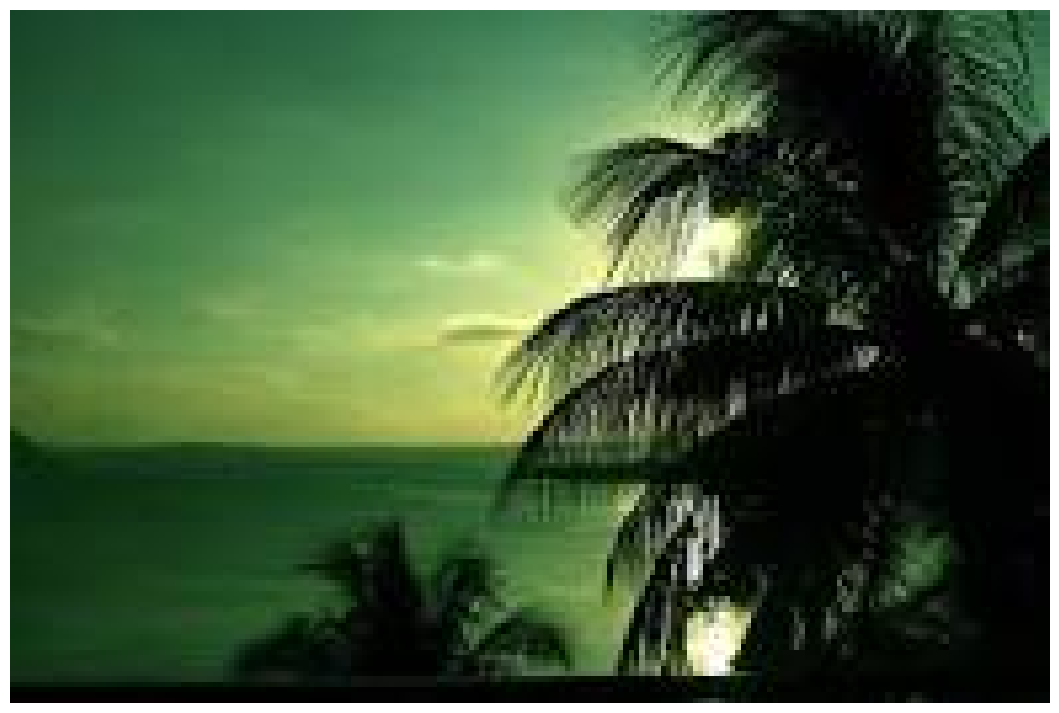

In [54]:
plt.figure(figsize=(16, 9))
plt.axis('off')
plt.imshow(dogs) 

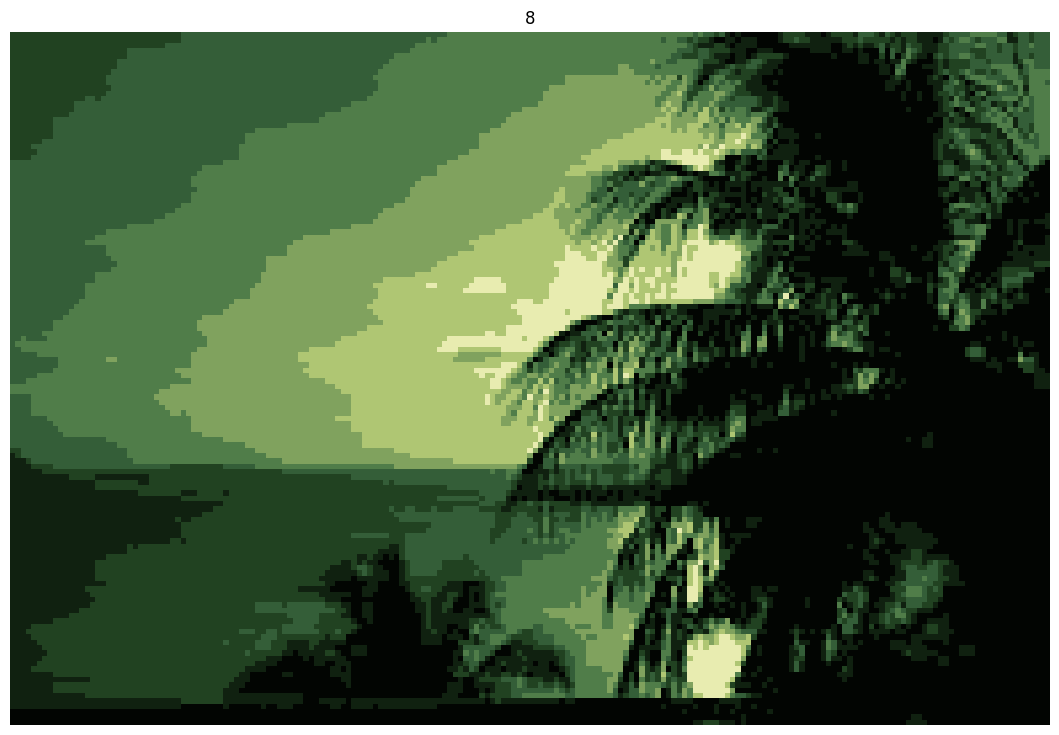

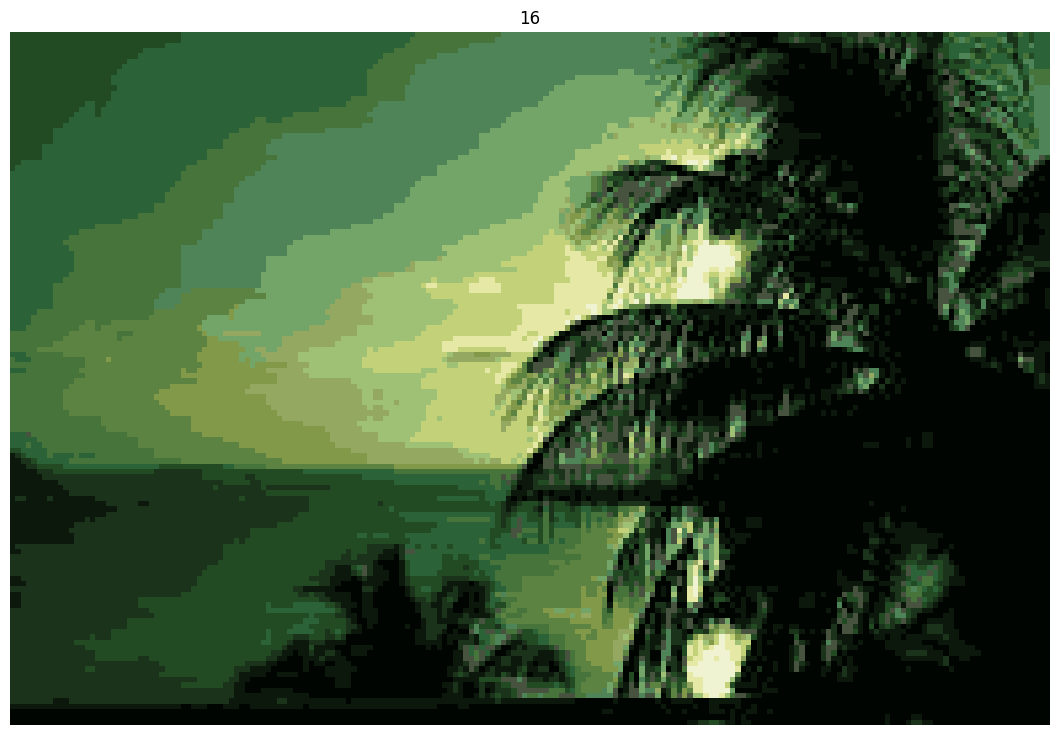

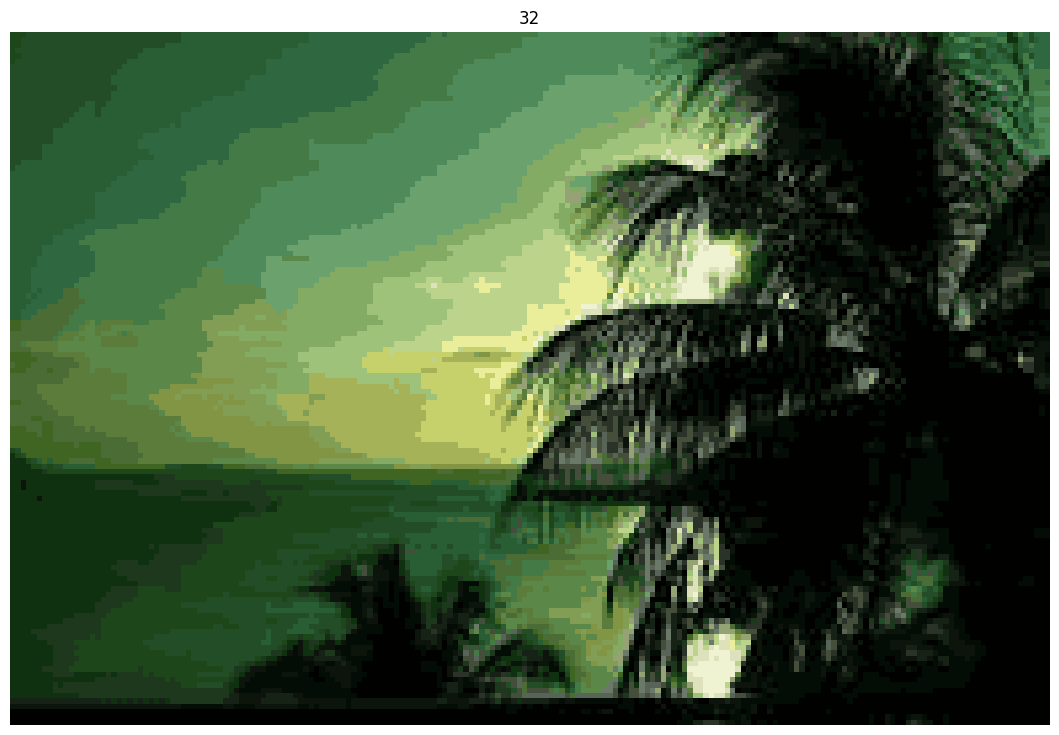

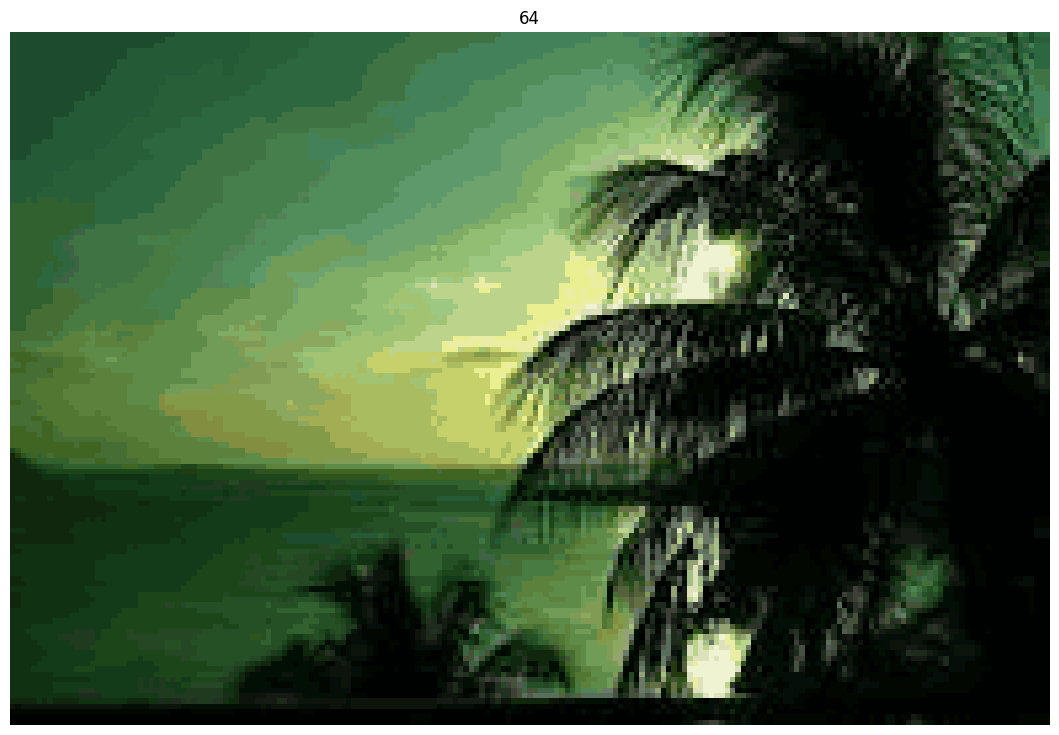

In [55]:
for model in models:
    labels = model.predict(dogs_array)
    plt.figure(figsize=(16, 9))
    plt.clf()
    plt.axis('off')
    plt.title(model.get_params().get("n_clusters"))
    plt.imshow(convert_rgb_to_image(model.cluster_centers_, labels, w, h))